In [1]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("50_Startups.csv")

In [3]:
len(dataset)

50

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.shape

(50, 5)

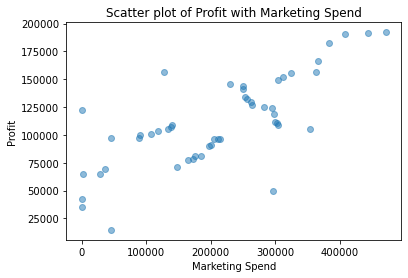

In [6]:
plt.scatter(dataset['Marketing Spend'],dataset['Profit'],alpha = 0.5)
plt.title("Scatter plot of Profit with Marketing Spend")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

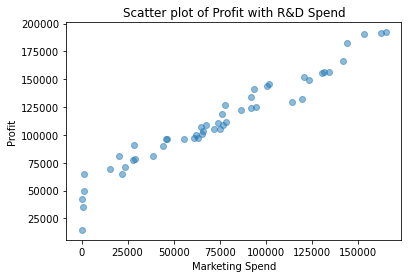

In [7]:
plt.scatter(dataset['R&D Spend'],dataset['Profit'],alpha = 0.5)
plt.title("Scatter plot of Profit with R&D Spend")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

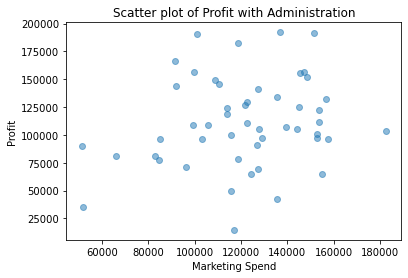

In [8]:
plt.scatter(dataset['Administration'],dataset['Profit'],alpha = 0.5)
plt.title("Scatter plot of Profit with Administration")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

Text(0, 0.5, 'Profite')

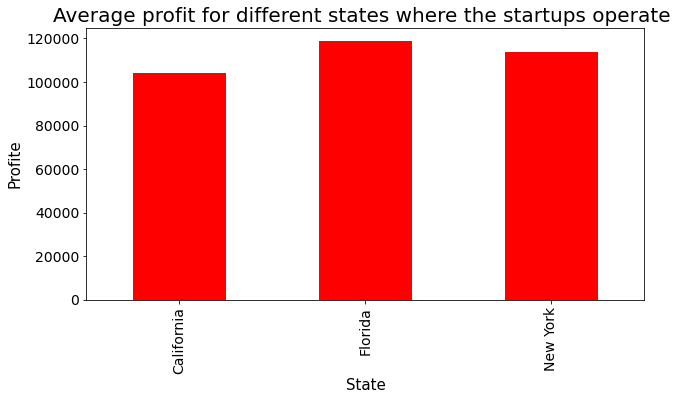

In [9]:
ax=dataset.groupby(["State"])["Profit"].mean().plot.bar(figsize = (10,5),fontsize = 14,color="red")

ax.set_title("Average profit for different states where the startups operate ",fontsize = 20)
ax.set_xlabel("State",fontsize = 15)
ax.set_ylabel("Profite",fontsize = 15)

In [10]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [18]:
##Create Dummy Variables
dataset["New York"] = np.where(dataset["State"] =="New York",1,0)
dataset["Florida"] = np.where(dataset["State"] =="Florida",1,0)
dataset["California"] = np.where(dataset["State"] =="California",1,0)
## Drop the orginal State Column from dataset
dataset.drop(columns=["State"],axis = 1, inplace = True)



In [19]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,Florida,California
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,0,1
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [20]:
##Bağımlı ve bağımsız değişken seçimi
dependent_variable = "Profit"

In [21]:
##Bağımsız değişkenlerin bir listesini oluştur 
independent_variables = dataset.columns.to_list()
independent_variables.remove(dependent_variable)


In [22]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'New York',
 'Florida',
 'California']

In [23]:
##Bağımsız değişkenlerin datasını oluştur
X = dataset[independent_variables].values
#Bağımlı değişkenin datasını oluştur.
y = dataset[dependent_variable].values

In [24]:
#ve dataseti train ve test için böl(split et)
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [25]:
#Datadaki veriler oldukça büyük olduğu için bu verileri scale et
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
#Scale edilmiş hâli
X_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 1.        ,
        0.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 1.        ,
        0.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 0.        ,
        1.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 1.        ,
        0.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 1.        ,
        0.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 1.        ,
        0.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [27]:
#Multi linear regresyon için fit et training seti
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [28]:
#Tahmin test sonuçlarını tahmin
y_pred = regressor.predict(X_test)


In [29]:
math.sqrt(mean_squared_error(y_test,y_pred))

9137.99015279493

In [30]:
r2_score(y_test,y_pred)

0.9347068473282427